## 2014 monthly average plots

In [1]:
# import relevant packages

from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import datetime as dt


In [2]:
# extract all monthly mean files for 2014
file_list = ['2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12']

In [3]:
# extract individual January file and assign as individual file, this will be useful later on
ind_nc = Dataset('C:/Users/natal/Desktop/cesm_project/NC_files/2014-h0/cesm220_FCnudged_f19_f19_mg17.cam.h0.2014-01.nc', 'r')
print(ind_nc.variables.keys()) # print variable keys, these are helpful to refer to throughout the notebook

# assign lons, lats and levels
ind_lon = ind_nc.variables['lon'][:]
ind_lat = ind_nc.variables['lat'][:]
ind_lev = ind_nc.variables['lev'][:]

# extract data across all 2014 file list and assign to a new list
all_files_nc = []
for file in file_list:
    file_nc = Dataset('C:/Users/natal/Desktop/cesm_project/NC_files/2014-h0/cesm220_FCnudged_f19_f19_mg17.cam.h0.' + file + '.nc', 'r')
    all_files_nc.append(file_nc)
print(np.shape(all_files_nc))    # check shape of file list

dict_keys(['lat', 'lon', 'gw', 'lev', 'hyam', 'hybm', 'P0', 'ilev', 'hyai', 'hybi', 'time', 'date', 'datesec', 'time_bnds', 'date_written', 'time_written', 'ndbase', 'nsbase', 'nbdate', 'nbsec', 'mdt', 'ndcur', 'nscur', 'co2vmr', 'ch4vmr', 'n2ovmr', 'f11vmr', 'f12vmr', 'sol_tsi', 'nsteph', 'C2H6', 'C3H8', 'CH3CHO', 'CO', 'CO2', 'GLYOXAL', 'H', 'H2', 'H2O', 'HNO3', 'HO2', 'NO', 'NO2', 'O', 'O3', 'OH', 'OMEGA', 'PAN', 'PS', 'SZA', 'T', 'U', 'V', 'Z3'])
(12,)


In [14]:
# create a time series for 2014
times = np.empty((12,1))
count = 0
for file in all_files_nc:
    time = file.variables['time'][:]
    times[count,:] = time
    count = count +1 
    
# create a date list for 2014 using time list data
base = dt.datetime(2013, 1, 1, 0, 0, 0)          # print metadata to see base start date (print(file.variables['time']))

date_list = [base + dt.timedelta(days=x) for x in times[:,0]]   
print(date_list)

[datetime.datetime(2014, 2, 1, 0, 0), datetime.datetime(2014, 3, 1, 0, 0), datetime.datetime(2014, 4, 1, 0, 0), datetime.datetime(2014, 5, 1, 0, 0), datetime.datetime(2014, 6, 1, 0, 0), datetime.datetime(2014, 7, 1, 0, 0), datetime.datetime(2014, 8, 1, 0, 0), datetime.datetime(2014, 9, 1, 0, 0), datetime.datetime(2014, 10, 1, 0, 0), datetime.datetime(2014, 11, 1, 0, 0), datetime.datetime(2014, 12, 1, 0, 0), datetime.datetime(2015, 1, 1, 0, 0)]


In [15]:
# assign lons and lats for all files

for file in all_files_nc:
    lon = file.variables['lon'][:]
    lat = file.variables['lat'][:]
    lev = file.variables['lev'][:]
    [lons, lats] = np.meshgrid(lon, lat)


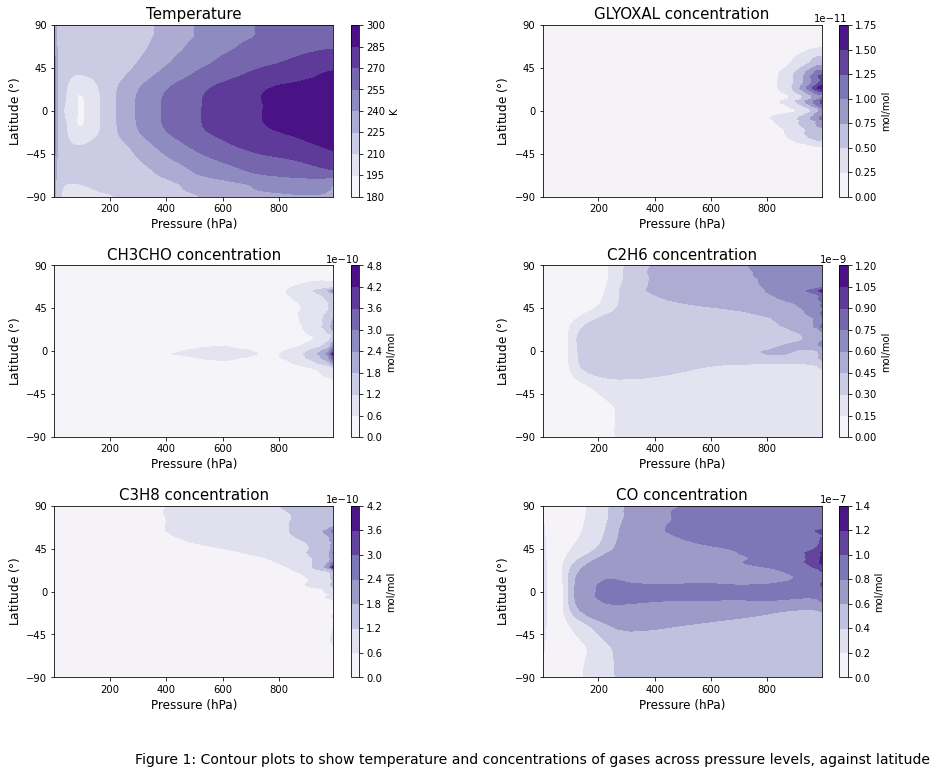

In [17]:
# time series - compare 2014 pressure levels

# create figure, subplots and change figure size
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.4)     # adjust space between plots

def yr_lev_14(ax, var):   
  # extract variable data for each month in 2014 and calculate the mean
    vars_total = np.empty((12, 56, 96, 144))
    count = 0
    for file in all_files_nc:
        variable = file.variables[var][:]
  # append each value to an array 
        vars_total[count,:] = variable
        count = count+1
   
 # calculate mean values to give yearly average of pressure levels
    mean_yr = np.mean(vars_total, axis=0)         # av over time to give yearly average
    lev_var = np.mean(mean_yr, axis=2)          # av over lons to give lat values for levs
    
  # transpose mean_lat array, so z corresponds to x and y variables
    tlev_var = lev_var.T

  # plot data on contour maps
    im = ax.contourf(lev, lat, tlev_var, cmap=plt.cm.Purples)     

  # edit axis ticks and labels
    ax.set_title(ind_nc.variables[var].long_name, size=15)
    ax.set_yticks([-90, -45, 0 , 45, 90])
    ax.set_ylabel('Latitude ($\degree$)', size=12)
    ax.set_xlabel('Pressure (' + ind_nc.variables['lev'].units + ')', size=12)
    
  # plot colour bars
    cb = plt.colorbar(im, ax=ax) 
    cb.set_label(ind_nc.variables[var].units) 

# call the function by assigning axes wih different variables 
yr_lev_14(ax1, 'T')           
yr_lev_14(ax2, 'GLYOXAL') 
yr_lev_14(ax3, 'CH3CHO') 
yr_lev_14(ax4, 'C2H6') 
yr_lev_14(ax5, 'C3H8') 
yr_lev_14(ax6, 'CO') 

# add figure caption
txt1='Figure 1: Contour plots to show temperature and concentrations of gases across pressure levels, against latitude'
fig.text(.2, .025, txt1, size=14)

plt.savefig('/Users/natal/Desktop/Jupyter_Spyder_files/Outputs6/Figure_1.png', dpi=300)  

plt.show()

In [18]:
# assign lev index to look at the lower section of the atmosphere - this can be altered if necessary
lev_bd = [790, 1000]     # glyoxal dominant here, and we're interested in the marine boundary layer: higher pressure - lower atm
lev_index = np.where((lev > lev_bd[0]) & (lev <= lev_bd[1]))
print(np.shape(lev_index))

(1, 13)


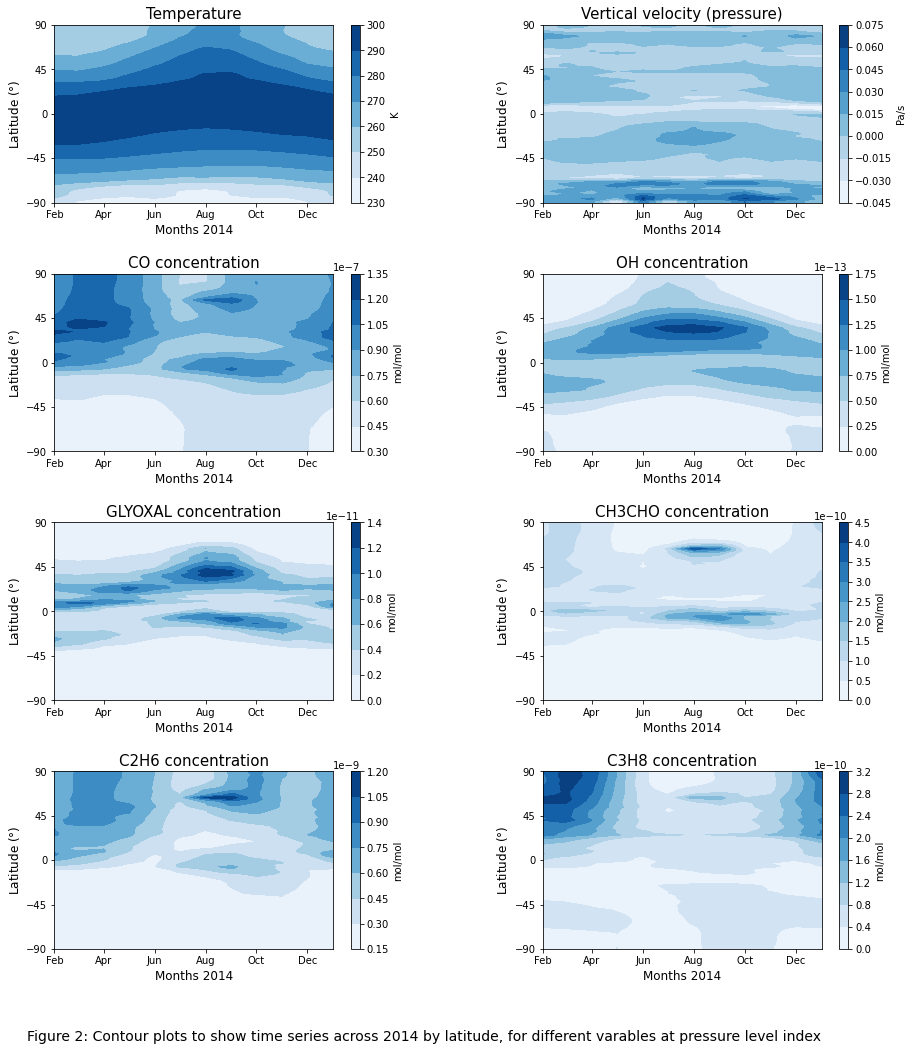

In [19]:
# time series - mean 2014 values and compare variables using levels index

# create figure, subplots and change figure size
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7,ax8)) = plt.subplots(4, 2, figsize=(15, 17))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

def lev_time_series_14(ax, var):    
  # extract variable data for each month and calculate the mean
    vars_total = np.empty((12, 13, 96, 144))
    count = 0
    for file in all_files_nc:
        variable = file.variables[var][:, lev_index[0], :, :]
  # append each value to an array 
        vars_total[count,:] = variable
        count = count+1
   
 # calculate mean values to give levs and lats
    mean_lev = np.mean(vars_total, axis=1)         # av over lev to give av pressure level
    mean_lat = np.mean(mean_lev, axis=2)            # av over lons to give lats
            
  # transpose mean_lat array 
    tmean_lat = mean_lat.T

  # plot data on contour maps
    im = ax.contourf(date_list, lat, tmean_lat, cmap=plt.cm.Blues)      

  # edit axis ticks and labels
    ax.set_title(ind_nc.variables[var].long_name, size=15)
    ax.set_yticks([-90, -45, 0 , 45, 90])
    ax.set_ylabel('Latitude ($\degree$)', size=12)
    ax.set_xticks(date_list[0:13:2])
    ax.set_xticklabels(['Feb', 'Apr', 'Jun', 'Aug', 'Oct', 'Dec'])
    ax.set_xlabel('Months 2014', size=12)
    
  # plot colour bars
    cb = plt.colorbar(im, ax=ax) 
    cb.set_label(ind_nc.variables[var].units)  # rotation=360)

# call the function by assigning axes wih different variables 
lev_time_series_14(ax1, 'T')         
lev_time_series_14(ax2, 'OMEGA')      
lev_time_series_14(ax3, 'CO')      
lev_time_series_14(ax4, 'OH') 
lev_time_series_14(ax5, 'GLYOXAL') 
lev_time_series_14(ax6, 'CH3CHO') 
lev_time_series_14(ax7, 'C2H6') 
lev_time_series_14(ax8, 'C3H8') 

# add figure caption
txt2='Figure 2: Contour plots to show time series across 2014 by latitude, for different varables at pressure level index'
fig.text(.1, .05, txt2, size=14)


plt.savefig('/Users/natal/Desktop/Jupyter_Spyder_files/Outputs6/Figure_2.png', dpi=300)  

plt.show()

In [20]:
# Cape Verde lat and lons: around 16°N and 23° W
ind_lon2 = ind_lon - 180    # note that initial lon boundaries = 0-360, so -180 to correspond to E to W

# set boundaries for Cape Verde coordinates
lon_bd2 = [-28, -19]
lat_bd2 = [14, 19]
lon_index = np.where((ind_lon2 > lon_bd2[0]) & (ind_lon2 < lon_bd2[1]))
lat_index = np.where((ind_lat > lat_bd2[0]) & (ind_lat < lat_bd2[1]))

print(lon_index)
print(lat_index)


(array([61, 62, 63, 64], dtype=int64),)
(array([55, 56, 57], dtype=int64),)


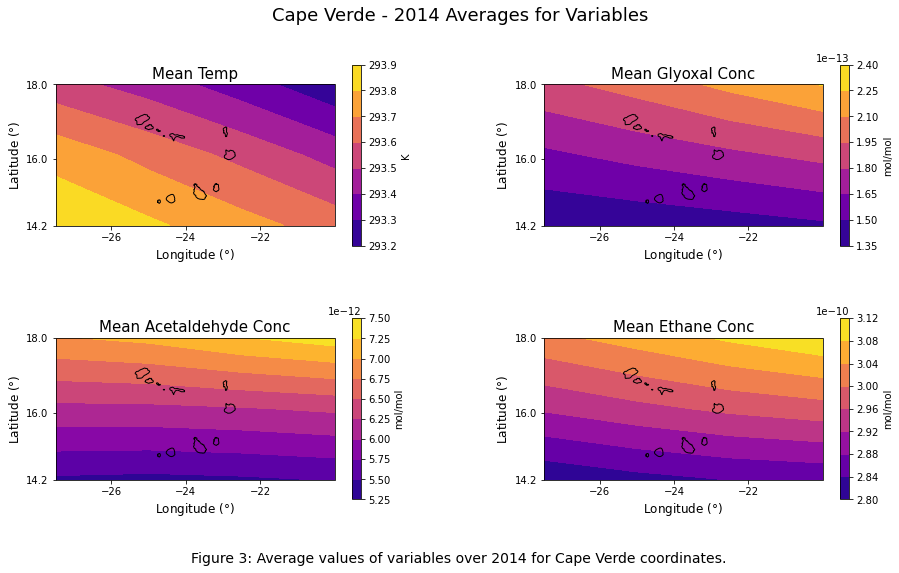

In [26]:
# time series - mean values 2014 and compare variables for Caoe Verde coordinates

# create figure, subplots and change figure size. Set projection so Islands can be shown with coastlines
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(15, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.4)     # adjust spacing betwee subplots

fig.suptitle('Cape Verde - 2014 Averages for Variables', size=18)     # add figure title

def Cape_verde14(ax, var, title):  
  # extract variable for each month and assign to empty array, using lev and lat/lon indices
    vars_total = np.empty((12, 13, 3, 4))    # note that level index has 13 values
    count = 0
    for file in all_files_nc:
        variable = file.variables[var][:, lev_index[0], lat_index[0], lon_index[0]]
        vars_total[count,:] = variable
        count = count +1
    
  # calculate mean yearly value for coordinates
    var_mean1 = np.mean(vars_total, axis=0)     # average over time
    var_mean2 = np.mean(var_mean1, axis=0)       # average of levs
    
  # plot contour plot of mean variable against lons and lats for Cape verde coordinates
    im = ax.contourf(ind_lon2[lon_index], ind_lat[lat_index], var_mean2, cmap=plt.cm.plasma)
    ax.coastlines() 
    
  # set the title and edit axis labels
    ax.set_title(title, size=15)
    ax.set_yticks([14.2, 16, 18])
    ax.set_ylabel('Latitude ($\degree$)', size=12)
    ax.set_xticks([-26, -24, -22])
    ax.set_xlabel('Longitude ($\degree$)', size=12)
    
  # plot colour bars
    cb = plt.colorbar(im, ax=ax) 
    cb.set_label(ind_nc.variables[var].units)  

# call the function by assigning axes wih different variables
Cape_verde14(ax1, 'T', 'Mean Temp')  
Cape_verde14(ax2, 'GLYOXAL', 'Mean Glyoxal Conc')   
Cape_verde14(ax3, 'CH3CHO', 'Mean Acetaldehyde Conc')         
Cape_verde14(ax4, 'C2H6', 'Mean Ethane Conc')   

# add figure caption
txt3='Figure 3: Average values of variables over 2014 for Cape Verde coordinates.'
fig.text(.25, .015, txt3, size=14)

plt.savefig('/Users/natal/Desktop/Jupyter_Spyder_files/Outputs6/Figure_3.png', dpi=300)  

plt.show()

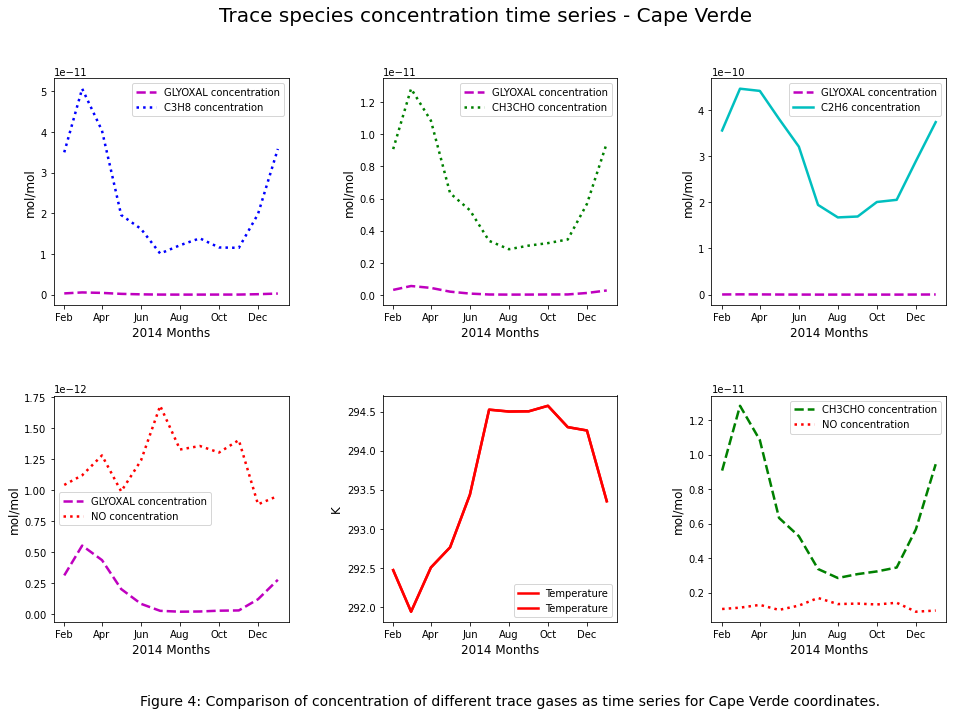

In [31]:
# look at some line plots of variables against each other

# create figure, subplots and alter figure size
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(16, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle('Trace species concentration time series - Cape Verde', size=20)

def variable_comparison_14(ax, var1, var2, col1, col2):
 # extract data over the year for two different variables
    var_total = np.empty((12, 13, 3, 4))
    var2_total =  np.empty((12, 13, 3, 4))
    count = 0
    for file in all_files_nc:
        variable = file.variables[var1][:, lev_index[0], lat_index[0], lon_index[0]]
        variable2 = file.variables[var2][:, lev_index[0], lat_index[0], lon_index[0]]
        var_total[count,:] = variable
        var2_total[count,:] = variable2
        count = count + 1
    
 # calculate the mean values of each variable
    mean1_var = np.mean(var_total, axis=1)    # av over levs
    mean2_var = np.mean(mean1_var, axis=1)    # av over lats
    mean3_var = np.mean(mean2_var, axis=1)    # av over lons

    mean1_var2 = np.mean(var2_total, axis=1)    # av over levs
    mean2_var2 = np.mean(mean1_var2, axis=1)    # av over lats
    mean3_var2 = np.mean(mean2_var2, axis=1)    # av over lons
    
 # plot data on contour maps, and set lables for legend (also set legend)
    ax.plot(date_list, mean3_var, col1, linewidth=2.5, label=ind_nc.variables[var1].long_name)
    ax.plot(date_list, mean3_var2, col2, linewidth=2.5, label=ind_nc.variables[var2].long_name)
    ax.legend()
    
 # edit axis ticks and labels
    ax.set_ylabel(ind_nc.variables[var2].units, size=12)
    ax.set_xticks(date_list[0:13:2])
    ax.set_xticklabels(['Feb', 'Apr', 'Jun', 'Aug', 'Oct', 'Dec'])
    ax.set_xlabel('2014 Months', size=12)

# call the function by assigning axes wih different variables    
variable_comparison_14(ax1, 'GLYOXAL', 'C3H8', 'm--', 'b:')
variable_comparison_14(ax2, 'GLYOXAL', 'CH3CHO', 'm--', 'g:')
variable_comparison_14(ax3, 'GLYOXAL', 'C2H6', 'm--', 'c-')
variable_comparison_14(ax4, 'GLYOXAL', 'NO', 'm--', 'r:')
variable_comparison_14(ax5, 'T', 'T', 'r-', 'r-')
variable_comparison_14(ax6, 'CH3CHO', 'NO', 'g--', 'r:')

# add figure caption
txt4='Figure 4: Comparison of concentration of different trace gases as time series for Cape Verde coordinates.'
fig.text(.2, .01, txt4, size=14)

plt.savefig('C:/Users/natal/Desktop/Jupyter_Spyder_files/Outputs6/Figure_4.png', dpi=300)  


# glyoxal concentrations are too small to compare directly with some of the variables
# next, I will do individual graphs to compare trends with glyoxal on bigger scales

plt.show()